In [1]:
import pandas as pd

fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)
fix_df

,qid,question_text,target
0,42b9446db515fcd253a7,What is the qualification for an animator or a...,0
1,bdad704204f8535e313a,Do different flavoured protein shakes have dif...,0
2,d13a0c498bf5a9cb2bc3,How does someone keep their children when they...,0
3,237828efb8348c39f14b,How much time required to learn Bollywood danc...,0
4,3c02e808603faa6ecc20,What skills can I have to fit in formulae one?,0
...,...,...,...
3995,8e636f1fb48158100adc,"In ancient China, there was nothing other than...",1
3996,bffed8f6e8fec61187b5,"I have a 3 inch penis, can I fuck a lot's girls?",1
3997,324670fdf6a9ba5cc019,Are all blacks from Haiti?,1
3998,e74c62301253bbc32563,Why are questions demonizing Israel okay but a...,1


In [2]:
import sys
sys.path.append('../../..')

from preprocessing import preprocessing_text_with_lemma
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [4]:
X.to_csv("preprocessed_text.csv")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=28)
print(X_train.shape)
print(X_test.shape)

(3600,)
(400,)


In [6]:
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

from TFIDFVectorizer import TFIDF
tfidf_vectorizer = TFIDF(X_train_list)
X_train_tfidf = tfidf_vectorizer.transform_tfidf(X_train_list)
X_test_tfidf = tfidf_vectorizer.transform_tfidf(X_test_list)

In [7]:
import pickle
with open('tfidf_10.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [8]:
from MultinomialWithEvidence import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train, tfidf_vectorizer.idf)
y_pred = mnb.predict(X_test_tfidf)

{0: 0.052, 1: 0.948}
{0: 0.987, 1: 0.013}
{0: 0.973, 1: 0.027}
{0: 0.826, 1: 0.174}
{0: 0.0, 1: 1.0}
{0: 0.874, 1: 0.126}
{0: 0.376, 1: 0.624}
{0: 0.295, 1: 0.705}
{0: 0.393, 1: 0.607}
{0: 0.348, 1: 0.652}
{0: 0.053, 1: 0.947}
{0: 0.065, 1: 0.935}
{0: 0.239, 1: 0.761}
{0: 0.962, 1: 0.038}
{0: 0.954, 1: 0.046}
{0: 0.004, 1: 0.996}
{0: 0.98, 1: 0.02}
{0: 0.964, 1: 0.036}
{0: 0.106, 1: 0.894}
{0: 0.005, 1: 0.995}
{0: 0.68, 1: 0.32}
{0: 0.0, 1: 1.0}
{0: 0.006, 1: 0.994}
{0: 0.004, 1: 0.996}
{0: 0.057, 1: 0.943}
{0: 0.001, 1: 0.999}
{0: 0.033, 1: 0.967}
{0: 0.262, 1: 0.738}
{0: 0.021, 1: 0.979}
{0: 0.001, 1: 0.999}
{0: 0.014, 1: 0.986}
{0: 0.001, 1: 0.999}
{0: 0.994, 1: 0.006}
{0: 0.96, 1: 0.04}
{0: 0.294, 1: 0.706}
{0: 0.48, 1: 0.52}
{0: 0.047, 1: 0.953}
{0: 0.106, 1: 0.894}
{0: 0.305, 1: 0.695}
{0: 0.492, 1: 0.508}
{0: 0.047, 1: 0.953}
{0: 0.017, 1: 0.983}
{0: 0.434, 1: 0.566}
{0: 0.252, 1: 0.748}
{0: 0.243, 1: 0.757}
{0: 0.003, 1: 0.997}
{0: 0.024, 1: 0.976}
{0: 0.01, 1: 0.99}
{0: 0.698,

In [9]:
y_pred_label = ["Sincere" if label == 0 else "Insincere" for label in y_pred]
predicted_data_tfidf = {"Question": X_test_tfidf, "Target": y_pred_label}
predicted_tfidf_df = pd.DataFrame(predicted_data_tfidf)
predicted_tfidf_df.to_csv('predicted_data_tfidf_10.csv', index=True)

In [10]:
y_pred_label = ["Sincere" if label == 0 else "Insincere" for label in y_pred]
predicted_data_tfidf = {"Question": X_test_tfidf, "Target": y_pred_label}
predicted_tfidf_df = pd.DataFrame(predicted_data_tfidf)
predicted_tfidf_df.to_csv('predicted_data_tfidf_10.csv', index=True)

In [11]:
TP_datas = [0] * len(y_pred)
TN_datas = [0] * len(y_pred)
FP_datas = [0] * len(y_pred)
FN_datas = [0] * len(y_pred)

y_test_list = y_test.tolist()
y_test_list_label = ["Sincere" if label == 0 else "Insincere" for label in y_test_list]

for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test_list[i] == 1:
        TP_datas[i] = 1
    elif y_pred[i] == 1 and y_test_list[i] == 0:
        FP_datas[i] = 1
    elif y_pred[i] == 0 and y_test_list[i] == 0:
        TN_datas[i] = 1
    elif y_pred[i] == 0 and y_test_list[i] == 1:
        FN_datas[i] = 1

scenario_result = {
    "Question": X_test,
    "Actual": y_test_list_label,
    "Prediction": y_pred_label,
    "TP": TP_datas,
    "TN": TN_datas,
    "FP": FP_datas,
    "FN": FN_datas
}

scenario_result_df = pd.DataFrame(scenario_result)
scenario_result_df.to_csv("scenario_result_10.csv", index=True)

In [12]:
error_prediction_df = scenario_result_df[scenario_result_df['Actual'] != scenario_result_df['Prediction']]
error_prediction_df.to_csv("error_prediction_10.csv", index=True)

In [13]:
import pickle
with open('x_train_tfidf_90.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)

In [14]:
import pickle
with open('x_test_tfidf_10.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

In [15]:
import pickle
with open('mnb_10.pkl', 'wb') as f:
    pickle.dump(mnb, f)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Confusion Matrix:")
cf = confusion_matrix(y_test, y_pred)
print(cf)

print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['Sincere', 'Insincere'])
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[159  56]
 [ 11 174]]

Classification Report:
              precision    recall  f1-score   support

     Sincere       0.94      0.74      0.83       215
   Insincere       0.76      0.94      0.84       185

    accuracy                           0.83       400
   macro avg       0.85      0.84      0.83       400
weighted avg       0.85      0.83      0.83       400


Accuracy: 0.83


In [17]:
accuracy = round(accuracy, 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

performance_score = [accuracy, precision, recall, f1]

import pickle
with open('performance_score_10.pkl', 'wb') as f:
    pickle.dump(performance_score, f)

In [18]:
import pickle
with open('confusion_matrix_10.pkl', 'wb') as f:
    pickle.dump(cf, f)

In [19]:
import pickle

with open('confusion_matrix_10.pkl', 'rb') as f:
    cf_matrix = pickle.load(f)

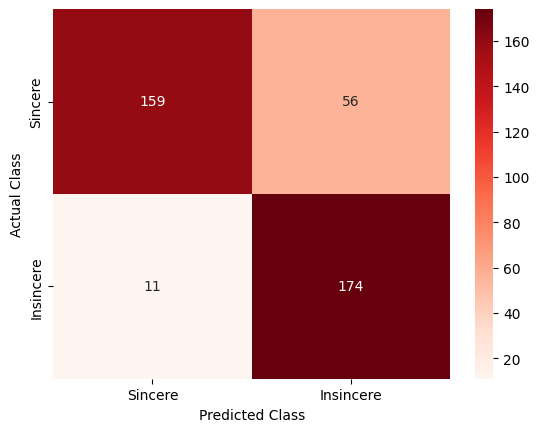

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix,cmap= "Reds",
            annot = True, 
            fmt='', 
            xticklabels = ['Sincere','Insincere'], 
            yticklabels = ['Sincere','Insincere'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")  

plt.show()

In [21]:
import numpy as np

sincere_train = np.sum(y_train == 0)
insincere_train = np.sum(y_train == 1)

sincere_test = np.sum(y_test == 0)
insincere_test = np.sum(y_test == 1)

print("Jumlah data Sincere dalam data pelatihan:", sincere_train)
print("Jumlah data Insincere dalam data pelatihan:", insincere_train)

print("Jumlah data Sincere dalam data pengujian:", sincere_test)
print("Jumlah data Insincere dalam data pengujian:", insincere_test)

Jumlah data Sincere dalam data pelatihan: 1785
Jumlah data Insincere dalam data pelatihan: 1815
Jumlah data Sincere dalam data pengujian: 215
Jumlah data Insincere dalam data pengujian: 185


Sincere:  215
Insincere:  185


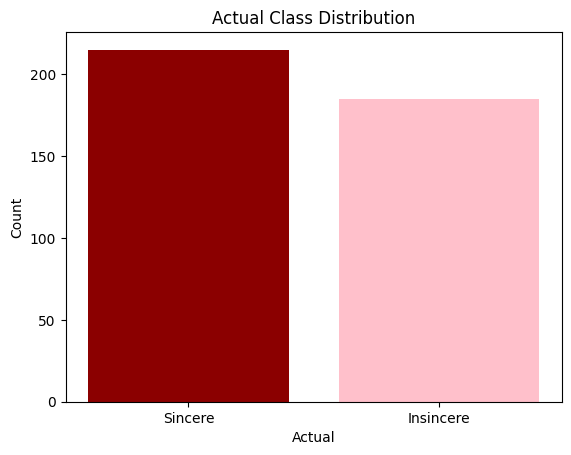

In [22]:
import matplotlib.pyplot as plt

# Data
categories = ['Sincere', 'Insincere']
values = [sincere_test, insincere_test]
colors = ['darkred', 'pink']  # Define colors for each category

print("Sincere: ", sincere_test)
print("Insincere: ", insincere_test)

# Create bar plot with different colors for each category
plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Actual Class Distribution')
plt.xlabel('Actual')
plt.ylabel('Count')

# Show plot
plt.show()

Sincere:  170
Insincere:  230


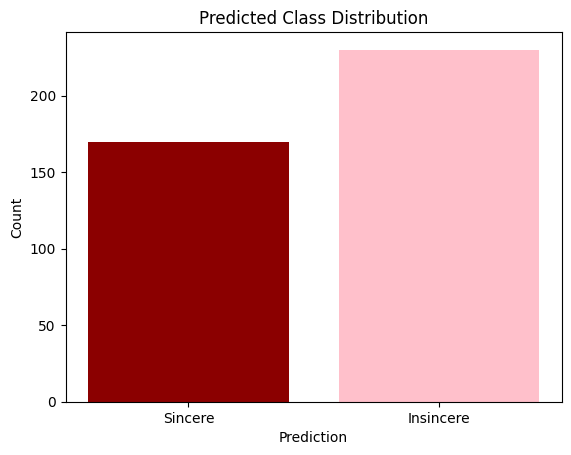

In [23]:
import matplotlib.pyplot as plt


total_sincere_prediction = cf[0, 0] + cf[1, 0] 
total_insincere_prediction = cf[1, 1] + cf[0, 1] 

print("Sincere: ", total_sincere_prediction)
print("Insincere: ", total_insincere_prediction)

# Data
categories = ['Sincere', 'Insincere']
values = [total_sincere_prediction, total_insincere_prediction]
colors = ['darkred', 'pink']  # Define colors for each category

# Create bar plot with different colors for each category
plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Predicted Class Distribution')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Show plot
plt.show()

In [24]:
X_train_array = np.array(X_train_list)
X_test_array = np.array(X_test_list)
X_train_tfidf_array = np.array(X_train_tfidf)
X_test_tfidf_array = np.array(X_test_tfidf)

merge_X = np.concatenate((X_train_array, X_test_array))
merge_X_tfidf = np.vstack((X_train_tfidf_array, X_test_tfidf_array))
merge_y = np.concatenate((y_train, y_pred))

data = {"Question": merge_X, "Label": merge_y}

# Add TF-IDF values to the dictionary
for i, vocab in enumerate(tfidf_vectorizer.vocabulary):
    vocab_val_list = [doc[i] for doc in merge_X_tfidf]
    data[vocab] = vocab_val_list

# # Create DataFrame from the dictionary
join_df = pd.DataFrame(data)
join_df

# # Display the DataFrame
sincere_df = join_df[join_df["Label"] == 0]
insincere_df = join_df[join_df["Label"] == 1]

In [25]:
sincere_df_vocab_only = sincere_df.drop(columns=['Question', 'Label'])
sincere_vocab_means = sincere_df_vocab_only.mean()
sincere_means_df = pd.DataFrame({'Vocab': sincere_vocab_means.index, 'TF-IDF Value': sincere_vocab_means.values})
sorted_sincere_means_df = sincere_means_df.sort_values(by='TF-IDF Value', ascending=False, ignore_index=True)

sorted_sincere_means_df.to_csv("tfidf_rank_sincere_final.csv")

In [26]:
insincere_df_vocab_only = insincere_df.drop(columns=['Question', 'Label'])
insincere_vocab_means = insincere_df_vocab_only.mean()
insincere_means_df = pd.DataFrame({'Vocab': insincere_vocab_means.index, 'TF-IDF Value': insincere_vocab_means.values})
sorted_insincere_means_df = insincere_means_df.sort_values(by='TF-IDF Value', ascending=False, ignore_index=True)

sorted_insincere_means_df.to_csv("tfidf_rank_insincere_final.csv")

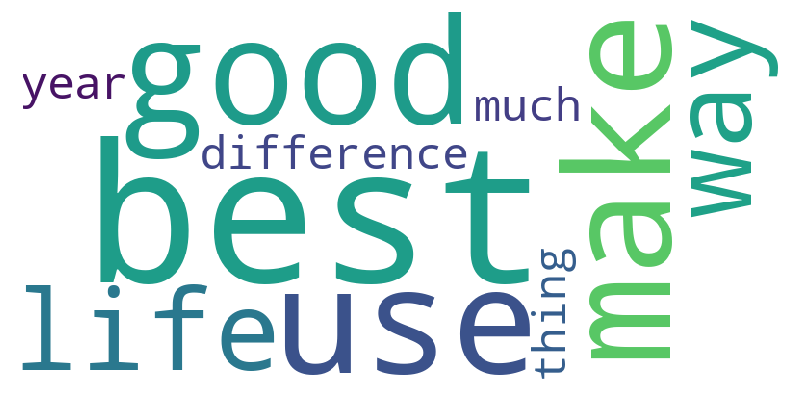

['best', 'get', 'good', 'like', 'make', 'use', 'life', 'way', 'difference', 'thing', 'much', 'year']


In [27]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sincere_vocab_df = pd.read_csv("tfidf_rank_sincere_final.csv")
vocab_list = sincere_vocab_df['Vocab'][:12].to_list()

text = ' '.join(vocab_list)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=10,
    collocations=False,  # Ensure words are not combined
    scale=1,  # Scaling factor
    relative_scaling=0.5,  # Relative importance of frequency vs. rank
    min_font_size=10,  # Minimum font size
    max_font_size=200  # Maximum font size
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='nearest')  # Using 'nearest' interpolation for sharper edges
plt.axis('off')  # Remove axis
plt.show()

print(vocab_list)

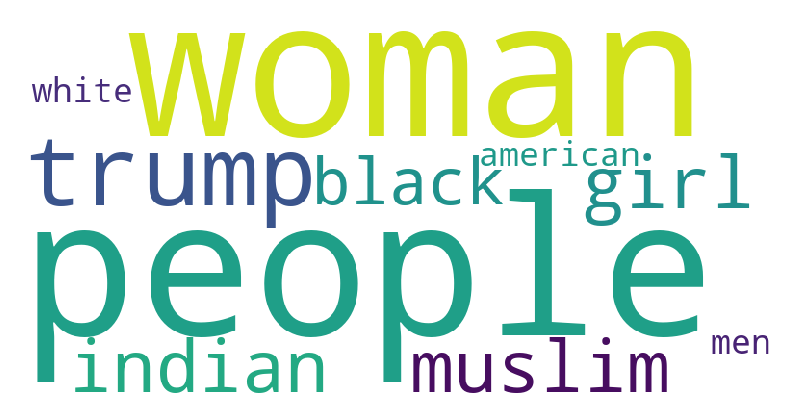

['people', 'woman', 'trump', 'muslim', 'indian', 'girl', 'black', 'like', 'american', 'men', 'white', 'hate']


In [28]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

insincere_vocab_df = pd.read_csv("tfidf_rank_insincere_final.csv")
vocab_list = insincere_vocab_df['Vocab'][:12].to_list()

text = ' '.join(vocab_list)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=10,
    collocations=False,  # Ensure words are not combined
    scale=1,  # Scaling factor
    relative_scaling=0.5,  # Relative importance of frequency vs. rank
    min_font_size=10,  # Minimum font size
    max_font_size=200  # Maximum font size
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='nearest')  # Using 'nearest' interpolation for sharper edges
plt.axis('off')  # Remove axis
plt.show()

print(vocab_list)